In [1]:
pip install investpy

     |████████████████████████████████| 4.4 MB 23.6 MB/s 
     |████████████████████████████████| 235 kB 42.1 MB/s 
     |████████████████████████████████| 6.3 MB 56.4 MB/s 
     |████████████████████████████████| 503 kB 83.7 MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=bae14894be386ae2c4fb9d13588782041913c09dbc698142a264f41dd2d57672
  Stored in directory: /root/.cache/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [1]:
#Load Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
import matplotlib.dates as mdates
import investpy
import statistics
import scipy.optimize as sco
import math
plt.rcParams['font.family'] = 'serif'

In [2]:
#Import data for selected companies 
start = '01/01/2010'
end = '31/12/2019'

stock_JKH = investpy.get_stock_historical_data(stock='JKH', country='Sri Lanka', from_date = start, to_date = end)
stock_CTC = investpy.get_stock_historical_data(stock='CTC', country='Sri Lanka', from_date = start, to_date = end) 
stock_HNB = investpy.get_stock_historical_data(stock='HNB', country='Sri Lanka', from_date = start, to_date = end)
stock_DIAL = investpy.get_stock_historical_data(stock='DIAL', country='Sri Lanka', from_date = start, to_date = end)
stock_COMB = investpy.get_stock_historical_data(stock='COMB', country='Sri Lanka', from_date = start, to_date = end)
stock_SPEN = investpy.get_stock_historical_data(stock='SPEN', country='Sri Lanka', from_date = start, to_date = end)
stock_NEST = investpy.get_stock_historical_data(stock='NEST', country='Sri Lanka', from_date = start, to_date = end) 
stock_SLTL = investpy.get_stock_historical_data(stock='SLTL', country='Sri Lanka', from_date = start, to_date = end)
stock_WATA = investpy.get_stock_historical_data(stock='WATA', country='Sri Lanka', from_date = start, to_date = end)
stock_DOCK = investpy.get_stock_historical_data(stock='DOCK', country='Sri Lanka', from_date = start, to_date = end)
stock_EXPO = investpy.get_stock_historical_data(stock='EXPO', country='Sri Lanka', from_date = start, to_date = end)
stock_HHL = investpy.get_stock_historical_data(stock='HHL', country='Sri Lanka', from_date = start, to_date = end)
stock_TKYO = investpy.get_stock_historical_data(stock='TKYO', country='Sri Lanka', from_date = start, to_date = end)
stock_LION = investpy.get_stock_historical_data(stock='LION', country='Sri Lanka', from_date = start, to_date = end)
stock_LHCL = investpy.get_stock_historical_data(stock='LHCL', country='Sri Lanka', from_date = start, to_date = end)

In [3]:
all_vals = [stock_JKH['Close'], stock_CTC['Close'], stock_HNB['Close'], stock_DIAL['Close'], stock_COMB['Close'], 
            stock_SPEN['Close'], stock_NEST['Close'], stock_SLTL['Close'], stock_WATA['Close'], stock_DOCK['Close'], 
            stock_EXPO['Close'], stock_HHL['Close'], stock_TKYO['Close'], stock_LION['Close'], stock_LHCL['Close']]

df = pd.concat(all_vals, axis=1)
df.columns = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']
df = df.dropna()

In [4]:
symbols = ['JKH','CTC', 'HNB', 'DIAL', 'COMB', 'SPEN', 'NEST', 'SLTL', 'WATA', 'DOCK', 'EXPO', 'HHL', 'TKYO', 'LION', 'LHCL']

In [5]:
len_symbols = len(symbols)

In [6]:
# Calculate percentage change in stock prices using log for represent data as time additive values.  

returns = df.pct_change().apply(lambda x: np.log(1+x))
returns

,JKH,CTC,HNB,DIAL,COMB,SPEN,NEST,SLTL,WATA,DOCK,EXPO,HHL,TKYO,LION,LHCL
Date,,,,,,,,,,,,,,,
2011-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-16,-0.004373,0.000541,-0.001389,-0.021053,-0.021799,-0.019298,-0.000568,0.001840,-0.004158,-0.007107,-0.039221,-0.004357,-0.017408,0.000000,-0.002436
2011-06-17,0.001055,-0.013606,-0.003620,0.000000,0.003567,-0.004883,0.000568,-0.007380,-0.004175,0.006696,0.015873,0.004357,0.017408,0.022473,0.000000
2011-06-20,-0.002694,0.007914,-0.011974,0.000000,0.017482,-0.009132,0.000426,0.012880,0.008333,0.000412,-0.007905,-0.010929,-0.015673,-0.000445,-0.014742
2011-06-21,-0.011543,-0.007914,-0.002308,0.010582,-0.003088,-0.009929,0.000142,-0.022182,-0.012526,0.001152,0.000000,-0.002200,0.001732,-0.043623,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,-0.003035,0.038925,-0.001751,0.000000,-0.005193,-0.010695,-0.013876,-0.003231,-0.011472,0.021942,-0.040005,0.002528,-0.006431,-0.019320,0.000000
2019-12-26,0.003035,-0.044365,-0.002845,0.000000,0.003141,0.029663,0.013876,0.009662,0.000000,0.045685,0.020203,0.045659,0.072571,0.000000,0.019324
2019-12-27,0.000000,0.000000,0.011451,0.000000,0.002052,-0.021098,-0.013095,0.000000,0.000000,-0.027488,0.000000,-0.045659,0.000000,0.000328,-0.002395


In [7]:
# Initial Weights
eq_w = len_symbols * [1 / len_symbols]

#Risk Free
rf = 0.0469

def calculate_return(weights):
    return np.dot(returns.mean(), weights) * 252

def calculate_std_dev(weights):
    return math.sqrt(np.dot(weights, np.dot(returns.cov(), weights)) * 252)

def calculate_sharpe(weights):
    return (calculate_return(weights) - rf) / calculate_std_dev(weights)

In [8]:
calculate_std_dev(eq_w)

0.15130815270570316

In [9]:
calculate_sharpe(eq_w)

-0.39205817206761545

In [10]:
np.random.seed(21)
num_ports = 20000

random_weights = np.random.random((num_ports, len(symbols)))
random_weights = (random_weights.T / random_weights.sum(axis=1)).T

In [11]:
def print_weights(weights):
    w = [round(i*100,2)for i in weights]
    w = pd.DataFrame(w, columns = ['Weight (%)'], index = returns.columns)
    print("\n",w)

In [12]:
simulations = [(calculate_return(w), calculate_std_dev(w),calculate_sharpe(w)) for w in random_weights]
simulations = np.array(simulations)

In [13]:
print("Efficient Frontier of the 15 Stocks Using Monte-Carlo Simulation: {:.3f}".format(simulations[:,2].max()))
print_weights(random_weights[simulations[:,2].argmax(),:])

min_vol_ret = simulations[simulations[:,1].argmin(),0]
min_vol_vol = simulations[simulations[:,1].argmin(),1]

max_sharpe_ret = simulations[simulations[:,2].argmax(),0]
max_sharpe_vol = simulations[simulations[:,2].argmax(),1]

max_ret_ret = simulations[simulations[:,2].argmax(),0]
max_ret_vol = simulations[simulations[:,1].argmax(),1]

Efficient Frontier of the 15 Stocks Using Monte-Carlo Simulation: 0.076

       Weight (%)
JKH         6.09
CTC         9.42
HNB         3.87
DIAL        9.45
COMB        7.24
SPEN        1.53
NEST        8.42
SLTL        0.33
WATA        7.54
DOCK        1.84
EXPO        3.86
HHL        15.72
TKYO        3.93
LION       17.57
LHCL        3.19


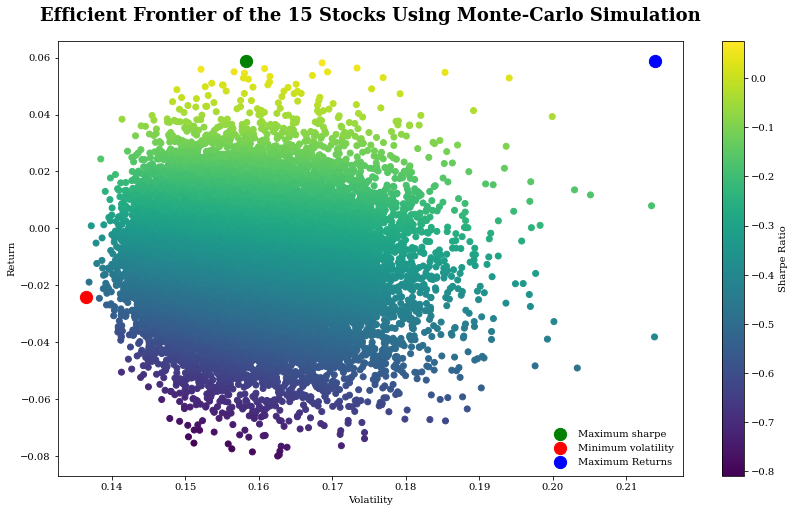

In [14]:
plt.figure(figsize=(14,8))
plt.scatter(simulations[:,1],simulations[:,0], c=simulations[:,2], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier of the 15 Stocks Using Monte-Carlo Simulation',fontsize=18,fontweight="bold", pad= 20)
plt.scatter(max_sharpe_vol, max_sharpe_ret,c='green', s=150, label='Maximum sharpe')
plt.scatter(min_vol_vol, min_vol_ret,c='red', s=150, label='Minimum volatility')
plt.scatter(max_ret_vol, max_ret_ret,c='blue', s=150, label='Maximum Returns')
plt.legend(frameon=False);

In [15]:
frontier_y = np.linspace(min_vol_ret,max_ret_ret)

frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':lambda eq_w: eq_w.sum() - 1},
            {'type':'eq', 'fun': lambda eq_w: calculate_return(eq_w) - possible_return})
    bounds = len_symbols * [(0, 1)]
    
    result = sco.minimize(calculate_std_dev, eq_w, bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

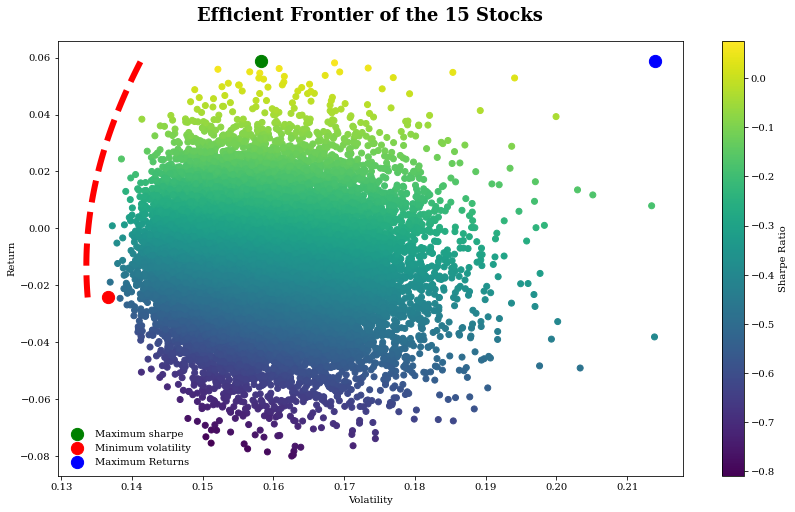

In [16]:
plt.figure(figsize=(14,8))
plt.scatter(simulations[:,1],simulations[:,0], c=simulations[:,2], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier of the 15 Stocks',fontsize=18,fontweight="bold", pad=20)
plt.plot(frontier_x,frontier_y, 'r--', linewidth=6)
plt.scatter(max_sharpe_vol, max_sharpe_ret,c='green', s=150, label='Maximum sharpe')
plt.scatter(min_vol_vol, min_vol_ret,c='red', s=150, label='Minimum volatility')
plt.scatter(max_ret_vol, max_ret_ret,c='blue', s=150, label='Maximum Returns')
plt.legend(frameon=False);

No handles with labels found to put in legend.


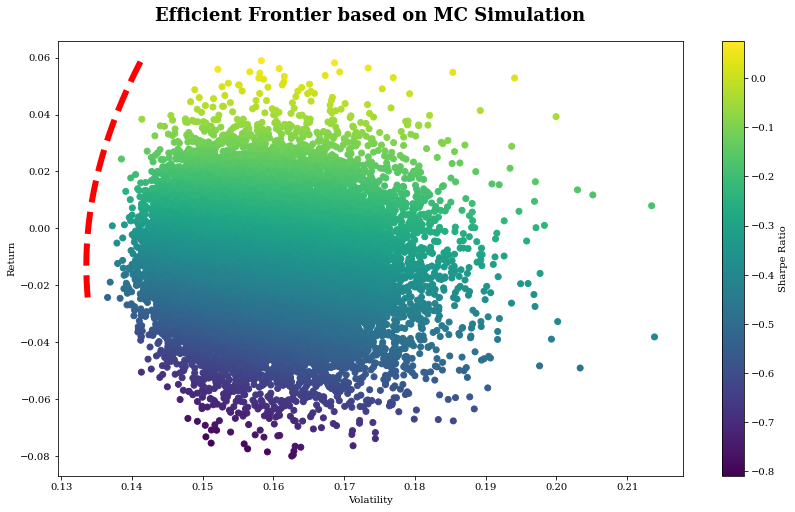

In [17]:
plt.figure(figsize=(14,8))
plt.scatter(simulations[:,1],simulations[:,0], c=simulations[:,2], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier based on MC Simulation',fontsize=18,fontweight="bold", pad=20)
plt.plot(frontier_x,frontier_y, 'r--', linewidth=6)
plt.legend(frameon=False);

In [18]:
# Set constrains and initial guess
cons = {'type': 'eq', 'fun': lambda eq_w: eq_w.sum() - 1}
bounds = len_symbols * [(0, 1)]

def min_max_sharpe(w):
    return -calculate_sharpe(w)

opt_results = sco.minimize(min_max_sharpe, eq_w, bounds = bounds, constraints=cons)
opt_w = opt_results['x']

print("Computational Optimized weights:")
print_weights(opt_w)
print("\n")
print("Indicators of Optimal Portfolio:")
print("Return {:.3f}, Volatility {:.3f}, Sharpe {:.3f}".format(calculate_return(opt_w), calculate_std_dev(opt_w),calculate_sharpe(opt_w)))

Computational Optimized weights:

       Weight (%)
JKH         0.00
CTC        50.96
HNB         0.00
DIAL        0.00
COMB        0.00
SPEN        0.00
NEST       11.96
SLTL        0.00
WATA        0.00
DOCK        0.00
EXPO        0.00
HHL        11.37
TKYO        0.00
LION       25.71
LHCL        0.00


Indicators of Optimal Portfolio:
Return 0.170, Volatility 0.211, Sharpe 0.583
